# Intro to 1D CNNs in Keras

In this lab we will use CNNs in Keras to analyze DNA data. We will get data from [this link](https://raw.githubusercontent.com/onceupon/deep_learning_DNA/master/humanvsran) with the corresponding labels [here](https://raw.githubusercontent.com/onceupon/deep_learning_DNA/master/humanvsran_label). Each piece of data is a DNA sequence that is either real or fake (i.e., generated randomly). The labels are 1 or 0, where 1 corresponds to a real DNA sequence and 0 to a fake DNA sequence.

### Task 1: Load the data.

First, load the data from the URL. For speed, you may want to load the data from the URL using the Python `requests` library. 

In the end, you should have two Pandas DataFrames (or numpy arrays), one for each of the two provided URLs. Each row (entry) should be a line from the file at the given `url`. We have created the dna_sequences (features not label) Pandas DataFrame for you.

In [0]:
# COMPLETED CODE
import numpy as np
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/onceupon/deep_learning_DNA/master/humanvsran"
labels_url = "https://raw.githubusercontent.com/onceupon/deep_learning_DNA/master/humanvsran_label"

# We created the DNA Pandas file for you
dna_data = requests.get(url).content
dna_sequences = pd.read_csv(io.StringIO(dna_data.decode('utf-8')), header=None)
label_data = requests.get(labels_url).content
labels = pd.read_csv(io.StringIO(label_data.decode('utf-8')), header=None)
print(dna_sequences.shape)
print(labels.shape)
dna_sequences.head()
labels.head()

(20000, 1)
(20000, 1)


,0
0,1
1,1
2,1
3,1
4,1


### Task 2: Convert data.

Using Pandas or NumPy, convert the data you loaded into a more usable form. You should convert every sequence into a matrix with 4 columns, where each row is a one-hot vector (index 0 = 'A', index 1 = 'C', index 2 = 'G', index 3 = 'T'). We then store these matrices in a numpy array (so that every row is a different matrix).

In [0]:
# fill in this function
def convert_dna_sequence_to_matrix(seq):
  # 1. create an empty matrix of size N by 4 (where N = len of seq)
  N = len(seq)
  matrix = np.zeros((len(seq), 4))
  # 2. create a dictionary that converts character to column index
  seqToCol = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
  # 3. run through sequence, for ch_i, matrix[i, col(ch_i)] = 1
  for i, ch in enumerate(seq):
    matrix[i, seqToCol[ch]] = 1
  return matrix 
  
"""
convert DNA sequence to n by 4 matrix
each column is a letter (base)
each row is a position
"""

# we finished preprocessing the data for you; we store these matrices in a numpy
# array. Please read about the iloc function in Python to understand what it does.
data = np.zeros((dna_sequences.shape[0], len(dna_sequences.iloc[0][0]), 4))
for i in range(dna_sequences.shape[0]):
  data[i, :, :] = convert_dna_sequence_to_matrix(dna_sequences.iloc[i][0])
print(dna_sequences.shape[0])
dna_sequences.iloc[0][0]
# data

20000


'CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCAGAGGTTGCAGTGAGCCAAGATCGCACCACTGCACTCCAGCCTGGCAACACAGCGAGAGTCTGTCTCCAAAAAAAAAAAAAAAGGCCCAAGAGCATTTCAAACTGTTTGTTGAGAGGTAATCTTATACATTCAGTTTCTTTTGGCTTACCTGAAGAGGTGCTTGGCTATGGTTAACAAACTACGTAAGCTGGTGAAAAAACCTGT'

In [0]:
test = np.zeros((20, 5, 4))
test

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]

In [0]:
data[0]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [0]:
data.shape

(20000, 250, 4)

Similarly, convert the labels to integers, store them in a 1D NumPy array. (Convert all zeros to -1)

In [0]:
targets = labels.to_numpy().reshape(len(data))
print(targets.dtype)

int64


### Task 3: Shuffle the data and partition.

Shuffle the data and partition it into testing and training sets.

In [0]:
import random
TEST_PROPORTION = 0.1

# Add code to load data into x_train, x_test, y_train, y_test

"""
We have a matrix of 20000 data points, each of which are 250 by 4 matrices.
"""

# 1. shuffle the data
n = len(targets)
perm = np.random.permutation(n)
X = data[perm]
y = targets[perm]

# 2. partition x into train and test
# number of datapoints we want
n_test = int(n * TEST_PROPORTION)

x_test = X[:n_test]
x_train = X[n_test:]

# 3. partition y into train and test
y_test = y[:n_test]
y_train = y[n_test:]

### Task 4: Let's make our model!

We've filled in much of the logic below, but you'll have to fill in the names of your train and test datasets. We've used `x_train`, `x_test`, `y_train`, and `y_test`.

In this model, we go through each 250 x 4 DNA sequence with a 1D convolutional filter. We then repeat with a max-pooling layer. Finally, we add some dense layers and regularization. We use the binary cross-entropy loss. 

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Can you improve this model?
model=Sequential()
model.add(Conv1D(
    filters=20,
    kernel_size=10,
    strides=1,
    padding='valid',
    input_shape=x_train[0].shape,
    activation='relu'
))
model.add(MaxPooling1D(
    pool_size=10,
    strides=5,
    padding='same'
))
model.add(Flatten())                      # makes everything into one vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))                   # used for regularization
model.add(Dense(1, activation='sigmoid')) # 1 makes it a one-vector, a number
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
history = model.fit(x_train, y_train, batch_size=16, epochs=3, verbose=1, validation_data= None,callbacks=[early_stopping])

Epoch 1/3
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1977 - accuracy: 0.9188
Epoch 2/3
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0442 - accuracy: 0.9866
Epoch 3/3
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.9908


### Task 5: Evaluate the model.

Compute the loss and accuracy on the test set. Then compute the false positive and true positive rates (assuming that 0.5 rounds to one, and anything less rounds to zero).

In [0]:
# Fill in and compute loss /accuracy (hint: consider model.evaluate)
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential#evaluate
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)


# Compute false + true positive rates - the percentage of data points in test data that we predicted to be real and were actually real
num_false_positives = 0
num_false_negatives = 0
for i in range(len(x_test)):
  pred = model.predict(x_test[i].reshape((1, x_test.shape[1], x_test.shape[2])))
  pred = 1 if pred >= 0.5 else 0
  if pred != y_test[i]:
    if pred == 1:
      num_false_positives += 1
    else: # predicted 0
      num_false_negatives += 1
  
print(num_false_positives/len(y_test))
print(num_false_negatives/len(y_test))

# trying to determine if the data is real (positive) and if the data is fake (negative)


63/63 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9960
0.016500715166330338 0.9959999918937683
0.002
0.002


### Task 6: Make an ROC curve.

We've provided code to help you extract the false positive rates and true positive rates for different thresholds. Create a plot with this data. (If you have time, you may find it useful to zoom in on the top-left corner.)

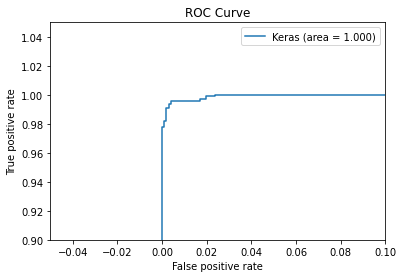

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.xlim(-0.05, 0.1)
plt.ylim(0.9, 1.05)
plt.plot(fpr_keras, tpr_keras, label = 'Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# we want the curve to be as close to 90 degrees as possible

### Task 7: If you finish early, explore!

Go back and examine the model more carefully. How large can you make the test set without degrading performance significantly? Do the activation functions affect the performance? Can you use fewer weights?